<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Particionamento da base

## Demonstração

### Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#métrica de performance
from sklearn.metrics import roc_auc_score

#modelo a ser treinado
from sklearn.tree import DecisionTreeClassifier

### Importação da base de dados

In [2]:
df = pd.read_csv('base_rh.csv',sep=";")

In [3]:
df.head()

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,...,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,...,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,...,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,...,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,...,Não,12,1,6,3,Muito bom,2,2,2,2


### Separação das bases em Treino e Teste

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Separação das variáveis explicativas e a variável target
x = df.drop('Funcionário_deixou_a_empresa', axis=1)
y = df['Funcionário_deixou_a_empresa']

In [6]:
# Criando as variáveis dummies
x = pd.get_dummies(x)
x.head()

,ID,Idade,Distância_do_trabalho,Salário,Qte_Empresas_Trabalhadas,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Tempo_de_empresa,...,Gênero_M,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras?_Não,Faz_hora_extras?_Sim,Equilibrio_de_Vida_Bom,Equilibrio_de_Vida_Excelente,Equilibrio_de_Vida_Muito bom,Equilibrio_de_Vida_Ruim
0,1,41,1,5993,8,11,0,8,0,6,...,1,0,0,1,0,1,0,0,0,1
1,2,49,8,5130,1,23,1,10,3,10,...,0,1,0,0,1,0,0,0,1,0
2,3,37,2,2090,6,15,0,7,3,0,...,0,0,0,1,0,1,0,0,1,0
3,4,33,3,2909,1,11,0,8,3,8,...,1,1,0,0,0,1,0,0,1,0
4,5,27,2,3468,9,12,1,6,3,2,...,0,1,0,0,1,0,0,0,1,0


In [7]:
# Particiona a base em 70% para Treino e 30% para Teste
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=50)

In [8]:
x.shape

(1470, 36)

In [9]:
1470*0.7

1029.0

In [11]:
X_test.shape

(441, 36)

### Treinamento de uma Árvore de Decisão usando Scikit Learn

In [12]:
modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

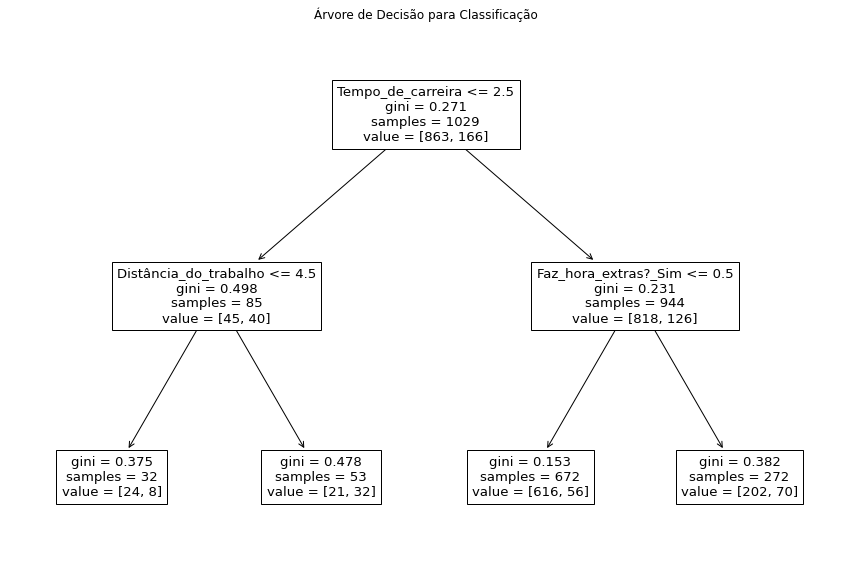

In [13]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo,feature_names=features);
plt.title("Árvore de Decisão para Classificação");

## Cálculo do AUC

In [14]:
# Treino
prob_train = modelo.predict_proba(X_train)[:,1]
roc_train = roc_auc_score(y_train, prob_train)
print("AUC em Treino:", roc_train)

AUC em Treino: 0.7079674433539489


In [15]:
# Teste
prob_test = modelo.predict_proba(X_test)[:,1]
roc_test = roc_auc_score(y_test, prob_test)
print("AUC em Teste:", roc_test)

AUC em Teste: 0.6882946326608298
